# 环境配置

## 每次运行前配置 

In [ ]:
# 配置文件
from google.colab import drive
drive.mount('/content/gdrive')

# 中文字体 黑体 simhei
%rm -rf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf
!cp /content/gdrive/MyDrive/'Colab Notebooks'/fonts/cn/simhei.ttf /content/gdrive/MyDrive/'Colab Notebooks'/cmtt10.ttf
!mv /content/gdrive/MyDrive/'Colab Notebooks'/cmtt10.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf

# 英文字体 arial
%rm -rf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf
!cp /content/gdrive/MyDrive/'Colab Notebooks'/fonts/en/arial.ttf /content/gdrive/MyDrive/'Colab Notebooks'/cmex10.ttf
!mv /content/gdrive/MyDrive/'Colab Notebooks'/cmex10.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf

# Task 1
!cp /content/gdrive/MyDrive/'Colab Notebooks'/CV/mchar_dataset/mchar* /content

!unzip mchar_train.zip
!unzip mchar_val.zip
!unzip mchar_test_a.zip

# Task 2
!cp /content/gdrive/MyDrive/'Colab Notebooks'/CV/pic/cat.jpg /content

## 官方配置，文档中可不运行

In [ ]:
# 文件初始化
import pandas as pd

data = pd.read_csv('mchar_data_list_0515.csv')

!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_train.zip
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_train.json
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_val.zip
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_val.json
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_test_a.zip
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_sample_submit_A.csv

,file,size,link
0,mchar_train.zip,345.91MB,http://tianchi-competition.oss-cn-hangzhou.ali...
1,mchar_train.json,3.16MB,http://tianchi-competition.oss-cn-hangzhou.ali...
2,mchar_val.zip,200.16MB,http://tianchi-competition.oss-cn-hangzhou.ali...
3,mchar_val.json,1.03MB,http://tianchi-competition.oss-cn-hangzhou.ali...
4,mchar_test_a.zip,370.6MB,http://tianchi-competition.oss-cn-hangzhou.ali...
5,mchar_sample_submit_A.csv,507.83KB,http://tianchi-competition.oss-cn-hangzhou.ali...


# Task 1 赛题理解

## 官方文档

In [ ]:
# Task 1 案例
import json
train_json = json.load(open('mchar_train.json'))

# 数据标注处理
def parse_json(d):
    arr = np.array([
        d['top'], d['height'], d['left'],  d['width'], d['label']
    ])
    arr = arr.astype(int)
    return arr

img = cv2.imread('mcahr_train/000000.png')
arr = parse_json(train_json['000000.png'])

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):
    plt.subplot(1, arr.shape[1]+1, idx+2)
    plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
    plt.title(arr[4, idx])
    plt.xticks([]); plt.yticks([])

## 运行演示

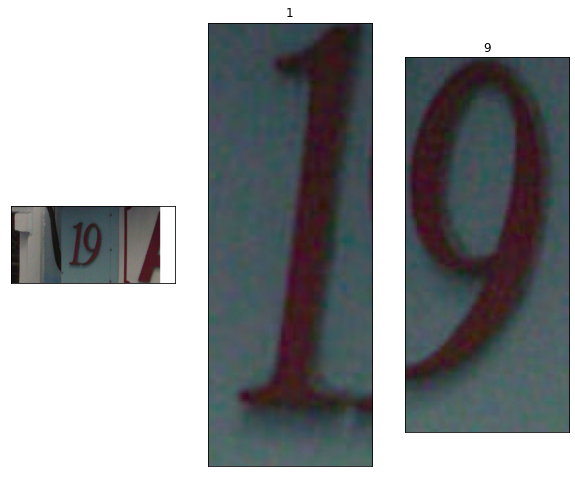

In [ ]:
# 运行
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_json = json.load(open('mchar_train.json'))

# 数据标注处理
def parse_json(d):
    arr = np.array([
        d['top'], d['height'], d['left'],  d['width'], d['label']
    ])
    arr = arr.astype(int)
    return arr

img = cv2.imread('mchar_train/000000.png')
arr = parse_json(train_json['000000.png'])

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

"""
# 数组每一层的个数
arr.shape
# 数组最外层的个数
arr.shape[0]
# 数组第二层的个数
arr.shape[1]
"""


for idx in range(arr.shape[1]):
    plt.subplot(1, arr.shape[1]+1, idx+2)
    # top: (top+height), left: (left+width)
    plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
    plt.title(arr[4, idx])
    plt.xticks([]); plt.yticks([])

# Task 2 数据读取与数据扩增

## 数据扩增案例

### Helper Function 首先运行

In [4]:
# 图片显示 helper function
# 将图片信息添加在对应列表中
def add_info(img, title, imgs, img_name):
    imgs.append(img)
    img_name.append(title)

# 创建一个名为cat的窗口，并设置大小 
def set_fig(w, h):
    plt.figure(num = 'cat', figsize = (w, h))

# 展示图片
def show_img(imgs, img_name, row_num, col_num):
    for i in range(len(imgs)):
        plt.subplot(row_num, col_num, i+1)
        plt.imshow(imgs[i])
        plt.title(img_name[i])
        plt.axis('off')

### Pillow库 基础操作

('R', 'G', 'B')
RGB
(500, 375)


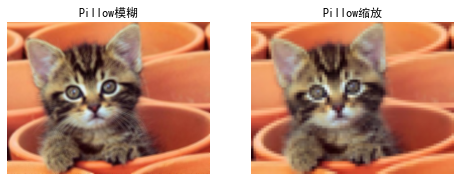

In [102]:
# Pillow库 基础操作
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

plt.rcParams['font.sans-serif']=['cmtt10', 'cmex10']

imgs = []
img_name = []

# 打开图片
img = Image.open('./cat.jpg')

# 图片的通道数量和名称
print(img.getbands())

# 图像的类型
print(img.mode)

# 图像的大小
print(img.size)

# 应用模糊滤镜
img_b = img.filter(ImageFilter.BLUR)
add_info(img_b, 'Pillow模糊', imgs, img_name)

# 照片缩放 按比例缩略
img_c = img
img_c.thumbnail((80, 80))
add_info(img_c, 'Pillow缩放', imgs, img_name)

# 显示图片
set_fig(8, 6)
show_img(imgs, img_name, 1, 2)

### OpenCV 基础操作

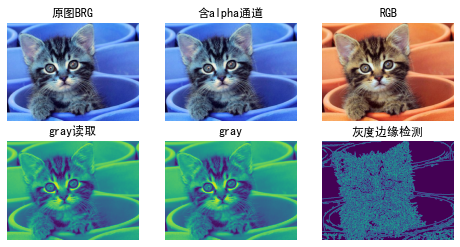

In [121]:
# OpenCV 基础操作
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

plt.rcParams['font.sans-serif']=['cmtt10', 'cmex10']

imgs = []
img_name = []

# 读取图片
img = cv2.imread('cat.jpg')

# OpenCV打开原图，默认颜色通道顺序是BRG
add_info(img, '原图BRG', imgs, img_name)

# 读入包括alpha通道的彩色图片
img_alpha = cv2.imread('cat.jpg', cv2.IMREAD_UNCHANGED)
add_info(img_alpha, '含alpha通道', imgs, img_name)

# Opencv默认颜色通道顺序是BRG，转换一下
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
add_info(img_rgb, 'RGB', imgs, img_name)

# 读取灰度图
img_gray2 = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
add_info(img_gray2, 'gray读取', imgs, img_name)

# 转换为灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
add_info(img_gray, 'gray', imgs, img_name)

# Canny边缘检测
img_edges = cv2.Canny(img_gray, 30, 70)
add_info(img_edges, '灰度边缘检测', imgs, img_name)

# 显示图片
set_fig(8, 4)
show_img(imgs, img_name, 2, 3)

### torchvision.transforms 数据扩增 常用方法 part 1

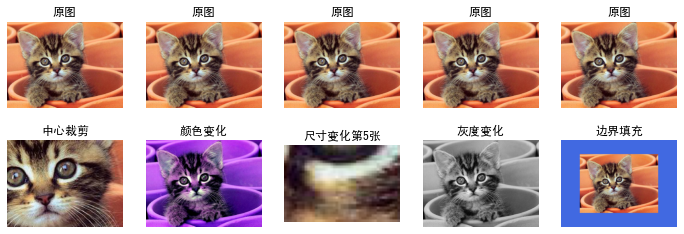

In [120]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
%matplotlib inline

plt.rcParams['font.sans-serif']=['cmtt10', 'cmex10']

imgs = []
img_name = []

# 打开图片
img = Image.open('./cat.jpg')

# 第一行：5张原图
for i in range(5):
    add_info(img, '原图', imgs, img_name)

"""
第二行：transforms.CenterCrop 对图片中心进行裁剪
            transforms.ColorJitter 对图像颜色的对比度、饱和度和零度进行变换
            transforms.FiveCrop 对图像四个角和中心进行裁剪得到五分图像
            transforms.Grayscale 对图像进行灰度变换
            transforms.Pad 使用固定值进行像素填充
"""
# 将图片从中心裁剪成150*200
crop_obj = transforms.CenterCrop((150, 200))  
img_crop = crop_obj(img)
add_info(img_crop, '中心裁剪', imgs, img_name)

# 调整图片颜色，可单独设置
# 随机调整亮度，对比度，饱和度，色调
# 在上下50%的浮动中随机调整
color_aug = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
img_color = color_aug(img)
add_info(img_color, '颜色变化', imgs, img_name)

# 图片裁剪成固定尺寸5份，TenCrop(size)类似
# 变量输入为图片的长，宽，可单值或（h,w）
# 五张图片位置：左上、右上、左下、右下、中
size_chg = transforms.FiveCrop((30, 45))
img_size = size_chg(img)
add_info(img_size[4], '尺寸变化第5张', imgs, img_name)

# 将图像转换为灰度
# 值为1时，正常的灰度图
# 值为3时， 3 channel with r == g == b
gray_color = transforms.Grayscale(3)
img_gray = gray_color(img)
add_info(img_gray, '灰度变化', imgs, img_name)

# 边界填充
# 变量：每个边框上的填充，填充颜色，填充类型
# 填充类型：constant：利用常值进行填充
#                edge：利用图像边缘像素点进行填充
#                reflect：利用反射的方式进行填充
#                symmetric：对称填充方法
pad_fill = transforms.Pad([120,90],fill=(65,105,225),padding_mode='constant')
img_pad = pad_fill(img)
add_info(img_pad, '边界填充', imgs, img_name)

# 显示图片
set_fig(12, 4)
show_img(imgs, img_name, 2, 5)

### torchvision.transforms 数据扩增 常用方法 part 2

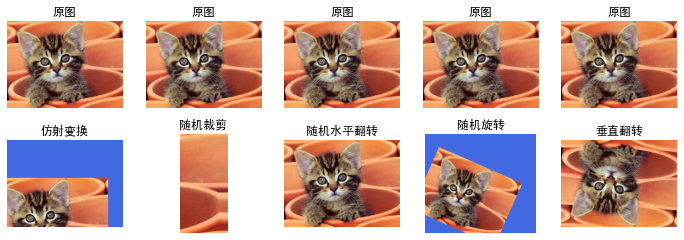

In [126]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
%matplotlib inline

plt.rcParams['font.sans-serif']=['cmtt10', 'cmex10']

imgs = []
img_name = []

# 打开图片
img = Image.open('./cat.jpg')

# 第一行：5张原图
for i in range(5):
    add_info(img, '原图', imgs, img_name)

"""
第二行：transforms.RandomAffine 随机仿射变换
            transforms.RandomCrop 随机区域裁剪
            transforms.RandomHorizontalFlip 随机水平翻转
            transforms.RandomRotation 随机旋转
            transforms.RandomVerticalFlip 随机垂直翻转
"""
# 随机仿射变化
# 变量：选择的度数范围，最大绝对偏移量，填充颜色
affine = transforms.RandomAffine(degrees = 0, translate = (0.2,0.5), fill = (65,105,225))
img_affine = affine(img)
add_info(img_affine, '仿射变换', imgs, img_name)

# 随机裁剪
# 变量：裁剪尺寸，填充边界的值，填充颜色，填充类型
# 填充类型：constant：利用常值进行填充
#                edge：利用图像边缘像素点进行填充
#                reflect：利用反射的方式进行填充
#                symmetric：对称填充方法
crop_set = transforms.RandomCrop((250,120), padding = 25, fill = 125, padding_mode = "edge")
img_crop = crop_set(img)
add_info(img_crop, '随机裁剪', imgs, img_name)

# 随机水平翻转
# p：翻转概率
hflip = transforms.RandomHorizontalFlip(p = 0.5)
img_hflip = hflip(img)
add_info(img_hflip, '随机水平翻转', imgs, img_name)

# 随机旋转
# 变量：旋转角度，旋转中心，是否显示整张输出图片，填充颜色
# expandexpand = False 则输出图片大小与输入图片一致
rotation = transforms.RandomRotation(45, center = (45, 45), expand = True, fill = (65,105,225))
img_rot = rotation(img)
add_info(img_rot, '随机旋转', imgs, img_name)

# 随机垂直翻转
# p：翻转概率
vflip = transforms.RandomVerticalFlip(p = 0.8)
img_vflip = vflip(img)
add_info(img_vflip, '垂直翻转', imgs, img_name)

# 显示图片
set_fig(12, 4)
show_img(imgs, img_name, 2, 5)

## Pytorch读取数据

### Dataset
对数据集的封装，提供索引方式的对数据样本进行读取

#### 官方文档

In [ ]:
import os, sys, glob, shutil, json
import cv2

from PIL import Image
import numpy as np

import torch
from torch.utils.data.dataset import Dataset
import torchvision.transforms as transforms

class SVHNDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label 
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None

    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)
        
        # 原始SVHN中类别10为数字0
        lbl = np.array(self.img_label[index], dtype=np.int)
        lbl = list(lbl)  + (5 - len(lbl)) * [10]
        
        return img, torch.from_numpy(np.array(lbl[:5]))

    def __len__(self):
        return len(self.img_path)

train_path = glob.glob('../input/train/*.png')
train_path.sort()
train_json = json.load(open('../input/train.json'))
train_label = [train_json[x]['label'] for x in train_json]

data = SVHNDataset(train_path, train_label,
          transforms.Compose([
              # 缩放到固定尺寸
              transforms.Resize((64, 128)),

              # 随机颜色变换
              transforms.ColorJitter(0.2, 0.2, 0.2),

              # 加入随机旋转
              transforms.RandomRotation(5),

              # 将图片转换为pytorch 的tesntor
              # transforms.ToTensor(),

              # 对图像像素进行归一化
              # transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
            ]))

#### 运行演示

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


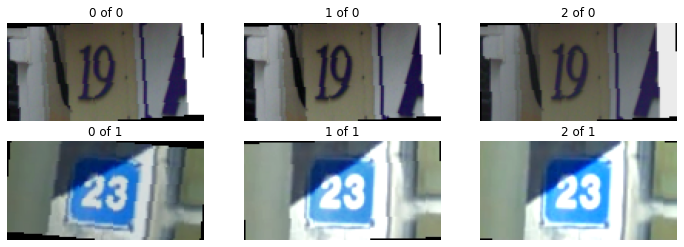

In [5]:
# glob：查找符合特定规则的目录和文件，并返回一个list
# shutil：进行复制和移动文件或者文件夹
import os, sys, glob, shutil, json
import cv2

from PIL import Image
import numpy as np

import torch
from torch.utils.data.dataset import Dataset
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

class SVHNDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label 
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None

    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)
        
        # 原始SVHN中类别10为数字0
        # label_list：将原本的label用10填充至5个元素的list
        lbl = np.array(self.img_label[index], dtype=np.int)
        lbl = list(lbl)  + (5 - len(lbl)) * [10]

        # torch.from_numpy() 把数组转换成张量，共享内存
        return img, torch.from_numpy(np.array(lbl[:5]))

    def __len__(self):
        return len(self.img_path)

train_path = glob.glob('./mchar_train/*.png')
train_path.sort()
train_json = json.load(open('mchar_train.json'))
# 二维数组，每张图片中的label
train_label = [train_json[x]['label'] for x in train_json]

data = SVHNDataset(train_path, train_label,
          transforms.Compose([
              # 缩放到固定尺寸 [h, w]
              transforms.Resize((64, 128)),

              # 随机颜色变换
              transforms.ColorJitter(0.2, 0.2, 0.2),

              # 加入随机旋转
              transforms.RandomRotation(5),

              # 将图片转换为pytorch 的tesntor
              # 将图片格式转化为 (c, h, w)
              # transforms.ToTensor(),

              # 对图像像素进行归一化
              # transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
            ]))
imgs = []
titles = []
for i in range(2):
    for j in range(3):
        img, img_tensor = data.__getitem__(i)
        title = str(j) + " of " + str(i)
        add_info(img, title, imgs, titles)

set_fig(12, 4)
show_img(imgs, titles, 2, 3)

### DataLoder
对Dataset进行封装，提供批量读取的迭代读取

#### 官方文档

In [ ]:
import os, sys, glob, shutil, json
import cv2

from PIL import Image
import numpy as np

import torch
from torch.utils.data.dataset import Dataset
import torchvision.transforms as transforms

class SVHNDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label 
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None

    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)
        
        # 原始SVHN中类别10为数字0
        lbl = np.array(self.img_label[index], dtype=np.int)
        lbl = list(lbl)  + (5 - len(lbl)) * [10]
        
        return img, torch.from_numpy(np.array(lbl[:5]))

    def __len__(self):
        return len(self.img_path)

train_path = glob.glob('../input/train/*.png')
train_path.sort()
train_json = json.load(open('../input/train.json'))
train_label = [train_json[x]['label'] for x in train_json]

train_loader = torch.utils.data.DataLoader(
        SVHNDataset(train_path, train_label,
                   transforms.Compose([
                       transforms.Resize((64, 128)),
                       transforms.ColorJitter(0.3, 0.3, 0.2),
                       transforms.RandomRotation(5),
                       transforms.ToTensor(),
                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])), 
    batch_size=10, # 每批样本个数
    shuffle=False, # 是否打乱顺序
    num_workers=10, # 读取的线程个数
)

for data in train_loader:
    break

#### 运行演示

In [ ]:
# glob：查找符合特定规则的目录和文件，并返回一个list
# shutil：进行复制和移动文件或者文件夹
import os, sys, glob, shutil, json
import cv2

from PIL import Image
import numpy as np

import torch
from torch.utils.data.dataset import Dataset
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

class SVHNDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label 
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None

    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)
        
        # 原始SVHN中类别10为数字0
        # label_list：将原本的label用10填充至5个元素的list
        lbl = np.array(self.img_label[index], dtype=np.int)
        lbl = list(lbl)  + (5 - len(lbl)) * [10]
        
        # torch.from_numpy() 把数组转换成张量，共享内存
        return img, torch.from_numpy(np.array(lbl[:5]))

    def __len__(self):
        return len(self.img_path)

train_path = glob.glob('./mchar_train/*.png')
train_path.sort()
train_json = json.load(open('mchar_train.json'))
# 二维数组，每张图片中的label
train_label = [train_json[x]['label'] for x in train_json]

train_loader = torch.utils.data.DataLoader(
        SVHNDataset(train_path, train_label,
                   transforms.Compose([
                       transforms.Resize((64, 128)),
                       transforms.ColorJitter(0.3, 0.3, 0.2),
                       transforms.RandomRotation(5),
                       transforms.ToTensor(),
                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])), 
    # 每批样本个数
    # 一共30000/10 = 3000组
    batch_size=10,
    # 是否打乱顺序
    shuffle=False,
    # 读取的线程个数
    num_workers=10,
)

cnt = 0
for data in train_loader:
    print(data)
    cnt += 1
    if cnt > 10:
        break

cnt = 0
for batch_idx, (imgs, labels) in enumerate(train_loader):
    print("batch_idx: ", batch_idx)
    for i in range(len(labels)):
        print(labels[i], imgs[i].shape)
    cnt += 1
    if cnt > 10:
        break